In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

In [6]:
import seaborn as sns

<Axes: xlabel='Literacy', ylabel='Lottery'>

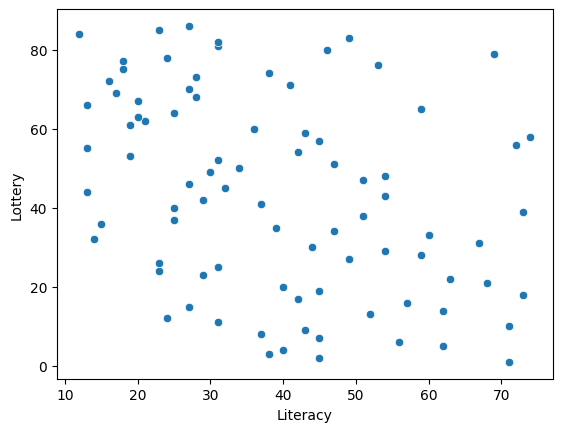

In [7]:
sns.scatterplot(data=dat,x='Literacy',y='Lottery')

<Axes: xlabel='Pop1831', ylabel='Lottery'>

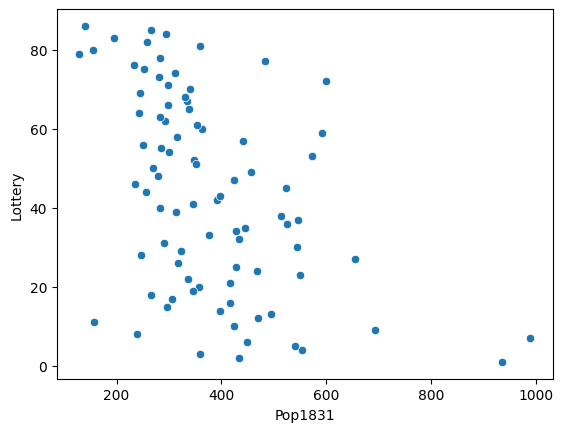

In [8]:
sns.scatterplot(data=dat,x='Pop1831',y='Lottery')

In [9]:
dat['logPop'] = np.log(dat['Pop1831'])

<Axes: xlabel='logPop', ylabel='Lottery'>

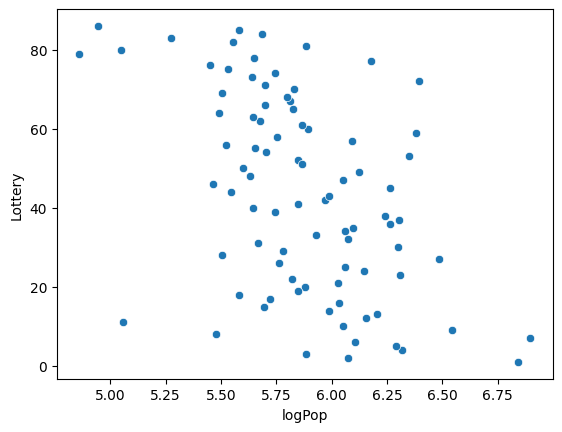

In [10]:
sns.scatterplot(data=dat,x='logPop',y='Lottery')

In [12]:
guerry = sm.datasets.get_rdataset("Guerry", "HistData")

In [18]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.90e-08
Time:                        18:01:53   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

NameError: name '__getattr__' is not defined

In [22]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

<Axes: >

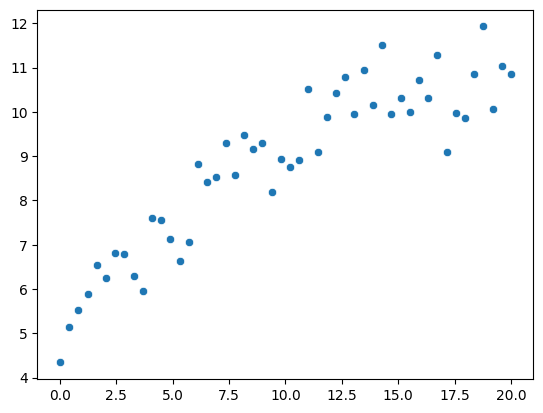

In [36]:
sns.scatterplot(x=x,y=y)

In [37]:
res = sm.OLS(y, X).fit()

In [38]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.56e-24
Time:                        18:46:01   Log-Likelihood:                -42.049
No. Observations:                  50   AIC:                             92.10
Df Residuals:                      46   BIC:                             99.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4642      0.031     15.097      0.0

In [39]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46418786  0.37719617 -0.01733313  5.20842705]
Standard errors:  [0.03074752 0.12087211 0.00269965 0.19936808]
Predicted values:  [ 4.77509881  5.18214133  5.55881025  5.88454873  6.14621876  6.34025974
  6.47327348  6.56093951  6.62543899  6.69181043  6.78383591  6.92013375
  7.11109959  7.3571984   7.64888809  7.96818727  8.2916295   8.59411879
  8.85305281  9.05203634  9.18357502  9.2503066   9.26456759  9.24636642
  9.22009609  9.21052645  9.23873464  9.31864212  9.45472746  9.64129047
  9.86338879 10.09929281 10.32405585 10.51361276 10.64873382 10.71818409
 10.72056928 10.66456486 10.56749065 10.45246528 10.34460784 10.26691085
 10.23646273 10.26164015 10.34073181 10.46221958 10.6066709  10.74993151
 10.86709389 10.93658956]


In [40]:
pred_ols = res.get_prediction()

In [43]:
pred_ols.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.775099,0.243885,4.284184,5.266014,3.499457,6.050741
1,5.182141,0.219905,4.739495,5.624788,3.924285,6.439997
2,5.558810,0.207554,5.141027,5.976594,4.309487,6.808134
3,5.884549,0.200949,5.480059,6.289038,4.639608,7.129490
4,6.146219,0.191940,5.759863,6.532574,4.907051,7.385386
5,6.340260,0.176026,5.985939,6.694581,5.110703,7.569816
6,6.473273,0.155041,6.161192,6.785355,5.255217,7.691330
7,6.560940,0.137418,6.284331,6.837548,5.351486,7.770393
8,6.625439,0.133949,6.355814,6.895064,5.417563,7.833315
9,6.691810,0.146115,6.397696,6.985925,5.478233,7.905387


In [44]:
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))

NameError: name 'plt' is not defined